In [1]:
import scanpy as sc
import pandas as pd

[Executed on 2023-10-25 14:16:48.000935]


In [2]:
#adata_subset=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset.h5ad")
adata=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated.h5ad")
known_cluster=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca.h5ad")
Satelite_glial_cells=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/satelite_glial_cell.h5ad")

[Executed on 2023-10-25 14:17:19.994051]


[Executed on 2023-10-25 14:18:56.555618]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


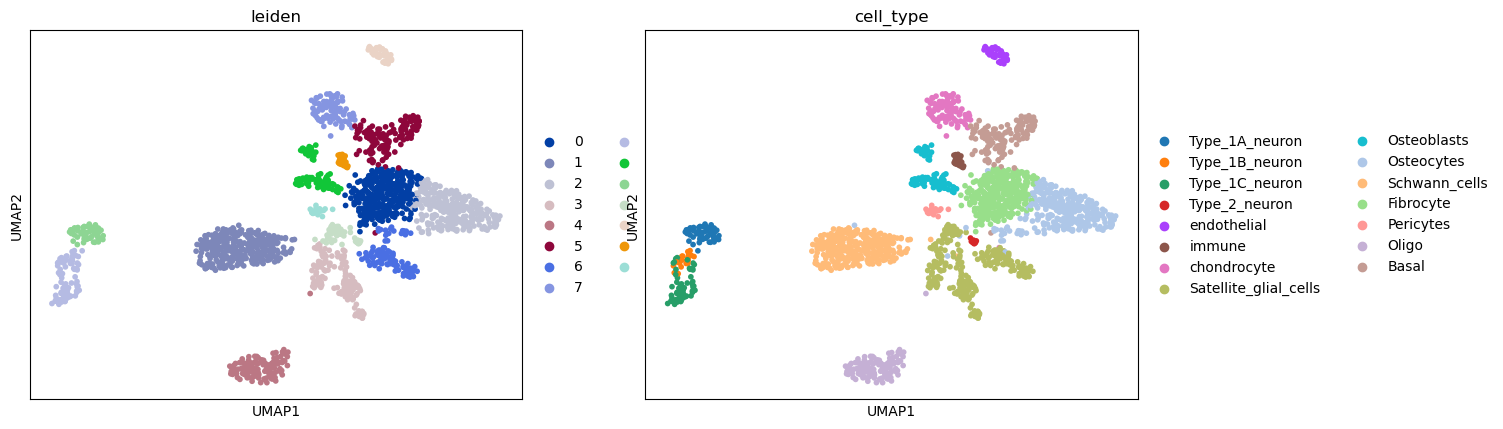

In [3]:
sc.pl.umap(known_cluster, color=['leiden','cell_type'])

In [17]:
known_cluster.obs['cell_type'].value_counts()

[Executed on 2023-10-25 11:39:28.465361]


cell_type
Fibrocyte                310
Schwann_cells            306
Osteocytes               289
Satellite_glial_cells    244
Oligo                    124
Basal                    124
chondrocyte               89
Osteoblasts               72
Type_1C_neuron            56
Type_1A_neuron            54
endothelial               39
immune                    21
Type_1B_neuron            19
Pericytes                 17
Type_2_neuron              8
Name: count, dtype: int64

In [4]:
Satelite_glial_cells=known_cluster[known_cluster.obs['cell_type']=='Satellite_glial_cells',:]
Satelite_glial_cells.obs['cell_type'].value_counts()

[Executed on 2023-10-25 14:19:01.288760]


cell_type
Satellite_glial_cells    244
Name: count, dtype: int64

In [53]:
Satelite_glial_cells

[Executed on 2023-10-25 11:56:34.926612]


View of AnnData object with n_obs × n_vars = 244 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_2nd', 'X_umap', 'X_umapOriginal', 'X_umap_2nd', 'X_umap_before'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-25 14:19:09.788905]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


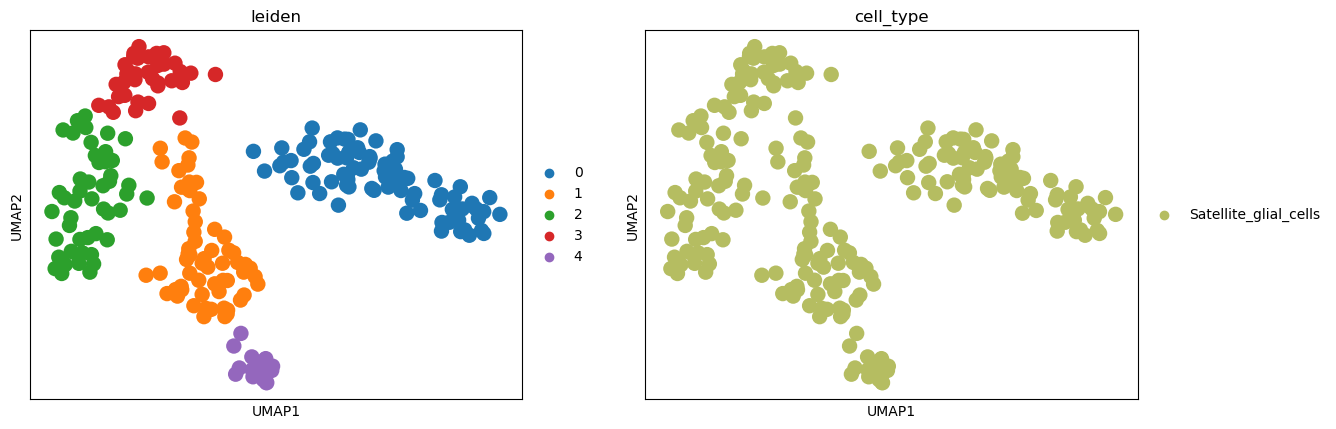

In [5]:
sc.tl.leiden(Satelite_glial_cells,resolution=0.2)
sc.pl.umap(Satelite_glial_cells, color=['leiden','cell_type'])

# clsuter 4 suspect to be group 3

In [6]:
del Satelite_glial_cells.uns['log1p']
sc.tl.rank_genes_groups(Satelite_glial_cells, 'leiden', method='wilcoxon')
sc.get.rank_genes_groups_df(Satelite_glial_cells, group='4',log2fc_min=0.25)

[Executed on 2023-10-25 14:19:45.548922]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

names    scores  logfoldchanges         pvals     pvals_adj
0        Fgf12  6.676188        4.833827  2.452378e-11  5.496092e-07
1         Meg3  6.632217        3.046218  3.306815e-11  5.496092e-07
2         Etl4  6.540612        4.833745  6.126760e-11  6.788654e-07
3      Gm27000  6.346409        5.262911  2.203989e-10  1.548233e-06
4       Prune2  6.320759        3.551401  2.602809e-10  1.548233e-06
...        ...       ...             ...           ...           ...
11897   Crebrf -3.283131        2.418651  1.026610e-03  1.015642e-01
11898    Bcas3 -3.482830        2.879229  4.961432e-04  5.827666e-02
11899     Ddx5 -3.539625        5.218264  4.006955e-04  4.914951e-02
11900     Smg6 -3.550618        3.670257  3.843279e-04  4.784810e-02
11901   Zbtb20 -4.642552        1.696618  3.441319e-06  1.225680e-03

[11902 rows x 5 columns]

[Executed on 2023-10-25 14:45:40.125465]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


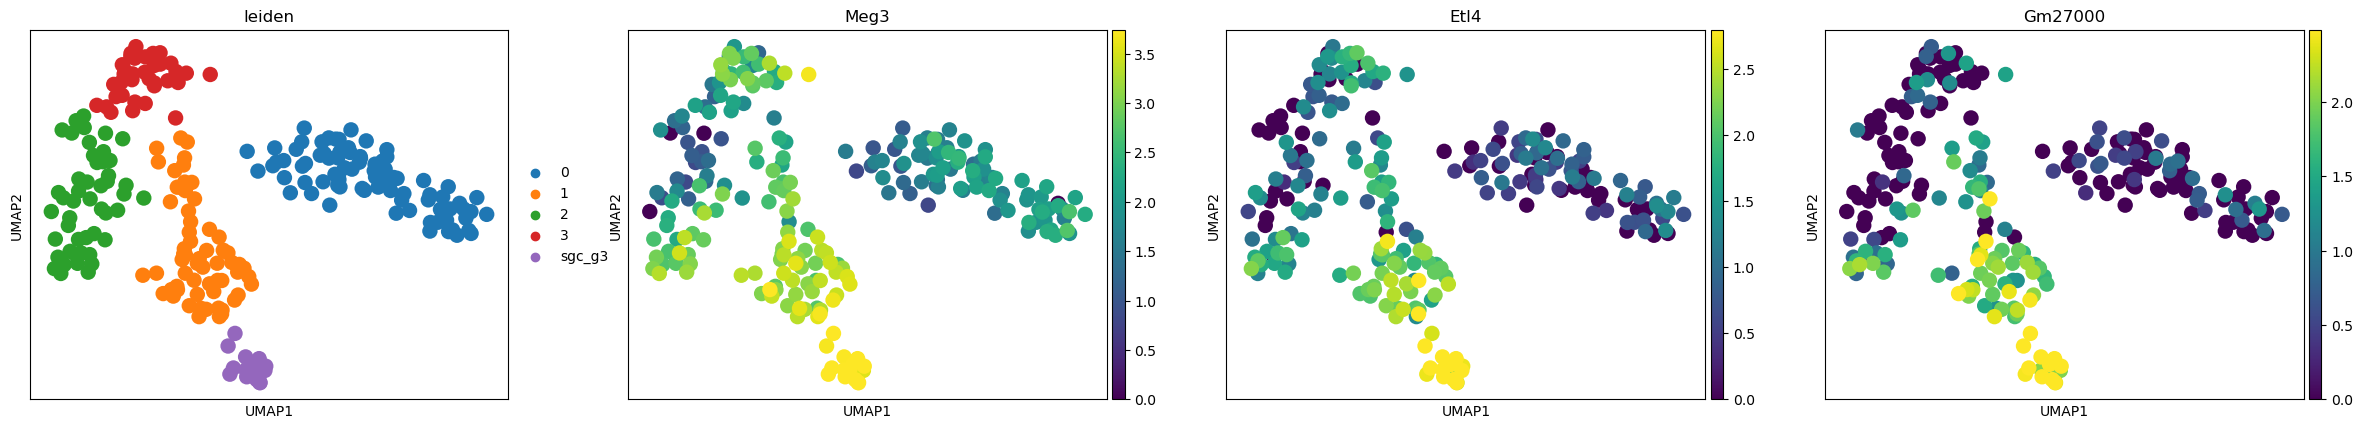

In [44]:
sc.pl.umap(Satelite_glial_cells, color=['leiden','Meg3','Etl4','Gm27000'],layer='log1p',vmax='p95')

In [43]:
# rename leiden group 4 as sgc_g3
Satelite_glial_cells.obs['leiden']=Satelite_glial_cells.obs['leiden'].astype(str)
Satelite_glial_cells.obs['leiden']=Satelite_glial_cells.obs['leiden'].replace({'4':'sgc_g3'})


[Executed on 2023-10-25 14:45:37.621433]


In [18]:
sc.get.rank_genes_groups_df(Satelite_glial_cells, group='0',log2fc_min=0.25)

[Executed on 2023-10-25 14:29:53.443515]


names    scores  logfoldchanges         pvals     pvals_adj
0       Aatk  8.694706        4.350929  3.477281e-18  1.651262e-14
1      Fgf14  8.535803        7.382475  1.391857e-17  4.626672e-14
2     Sh3tc2  7.496229        7.456287  6.568018e-14  8.397211e-11
3      Limk2  7.180336        5.743373  6.954031e-13  5.778974e-10
4     Adgrb3  7.061637        2.442261  1.645525e-12  1.272067e-09
...      ...       ...             ...           ...           ...
5610   Lrmda -3.565758        1.515831  3.628059e-04  1.212063e-02
5611    Pcca -3.695944        1.610551  2.190711e-04  8.091270e-03
5612    Msi2 -3.759123        6.173337  1.705102e-04  6.605979e-03
5613  Chst11 -4.659895        5.837127  3.163701e-06  2.552538e-04
5614   Tmtc4 -4.857089        3.333433  1.191240e-06  1.103009e-04

[5615 rows x 5 columns]

[Executed on 2023-10-25 14:31:00.837448]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


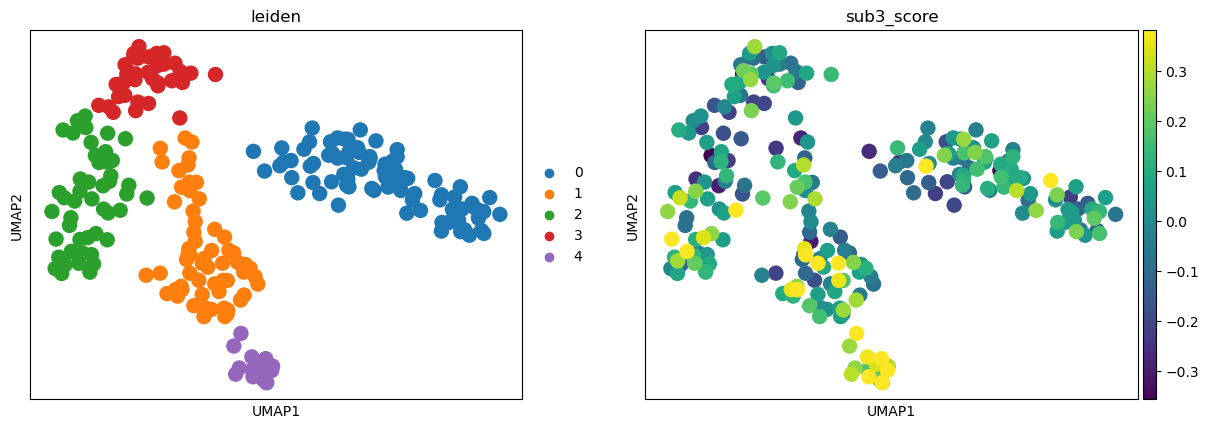

In [21]:
sc.pl.umap(Satelite_glial_cells, color=['leiden','sub3_score'],vmax='p95')

[Executed on 2023-10-25 14:25:34.407758]


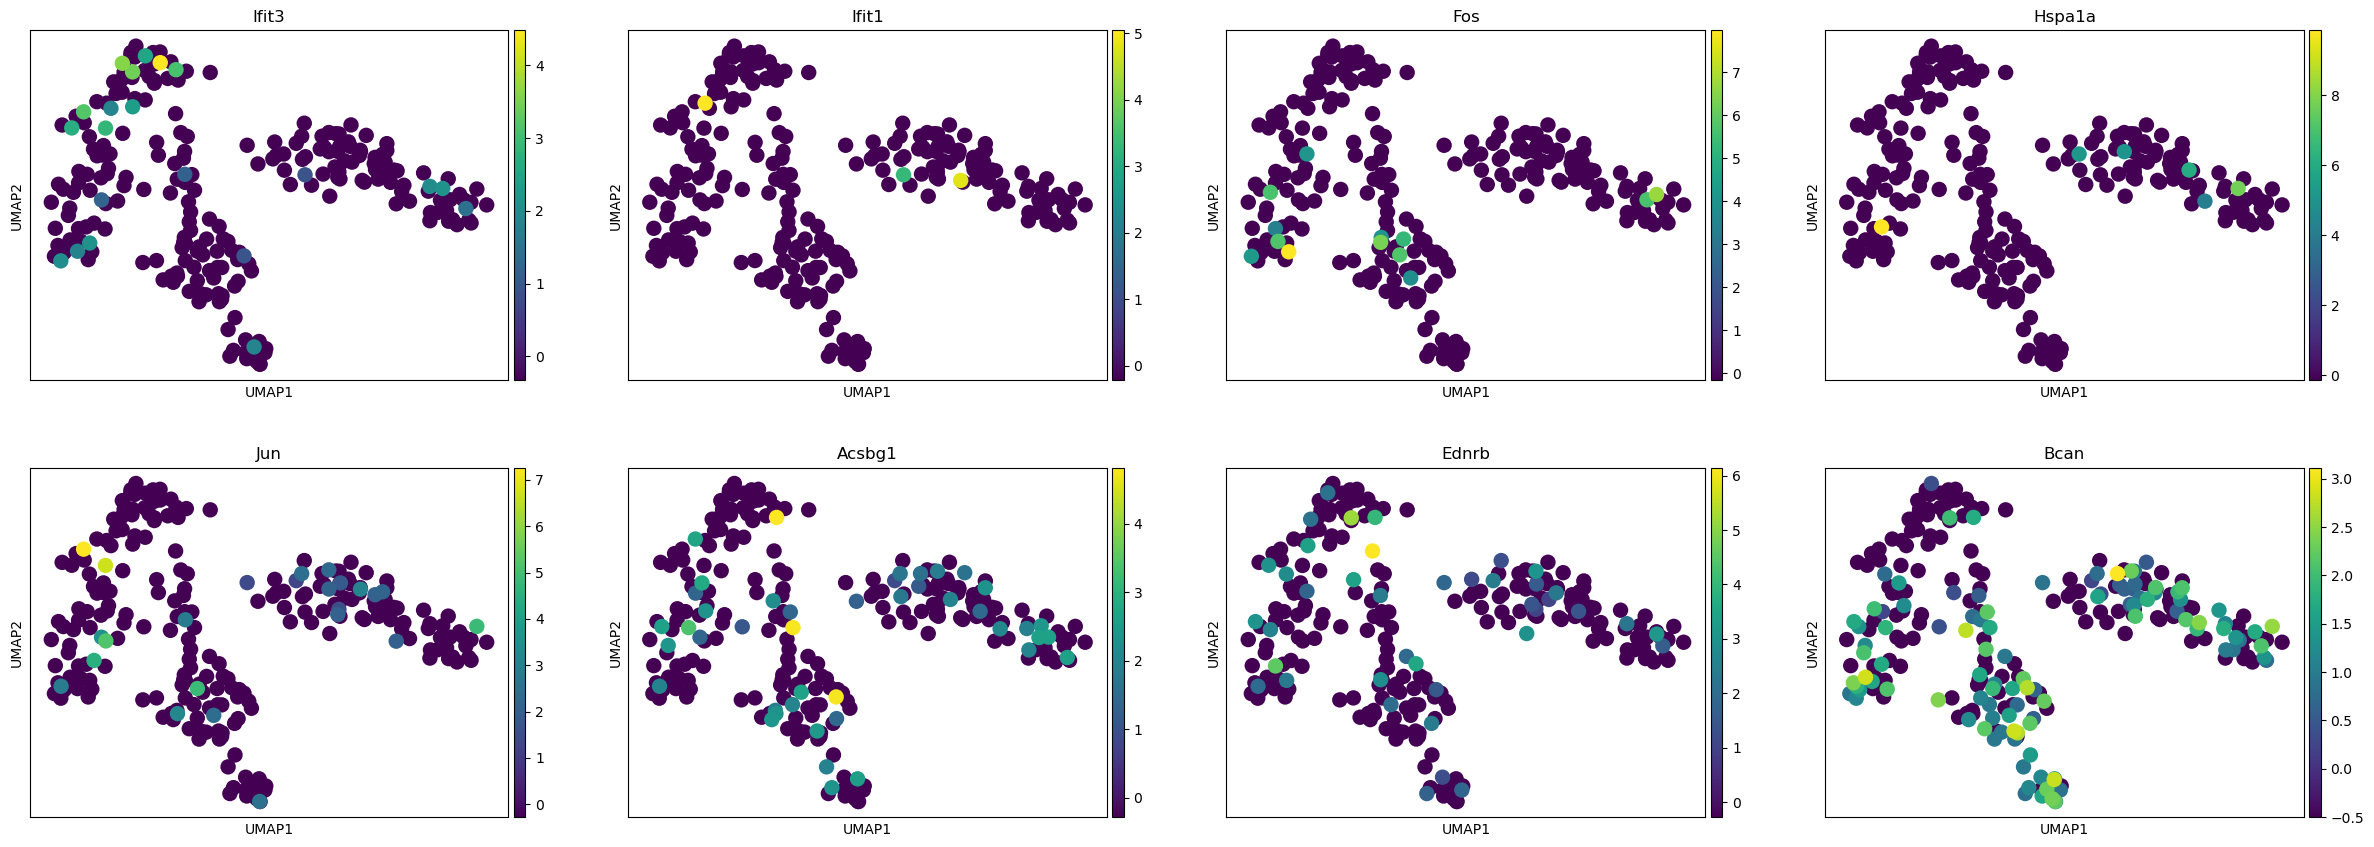

In [13]:
sc.pl.umap(Satelite_glial_cells,color=['Ifit3','Ifit1','Fos','Hspa1a','Jun','Acsbg1','Ednrb','Bcan'])

[Executed on 2023-10-25 15:50:08.950202]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


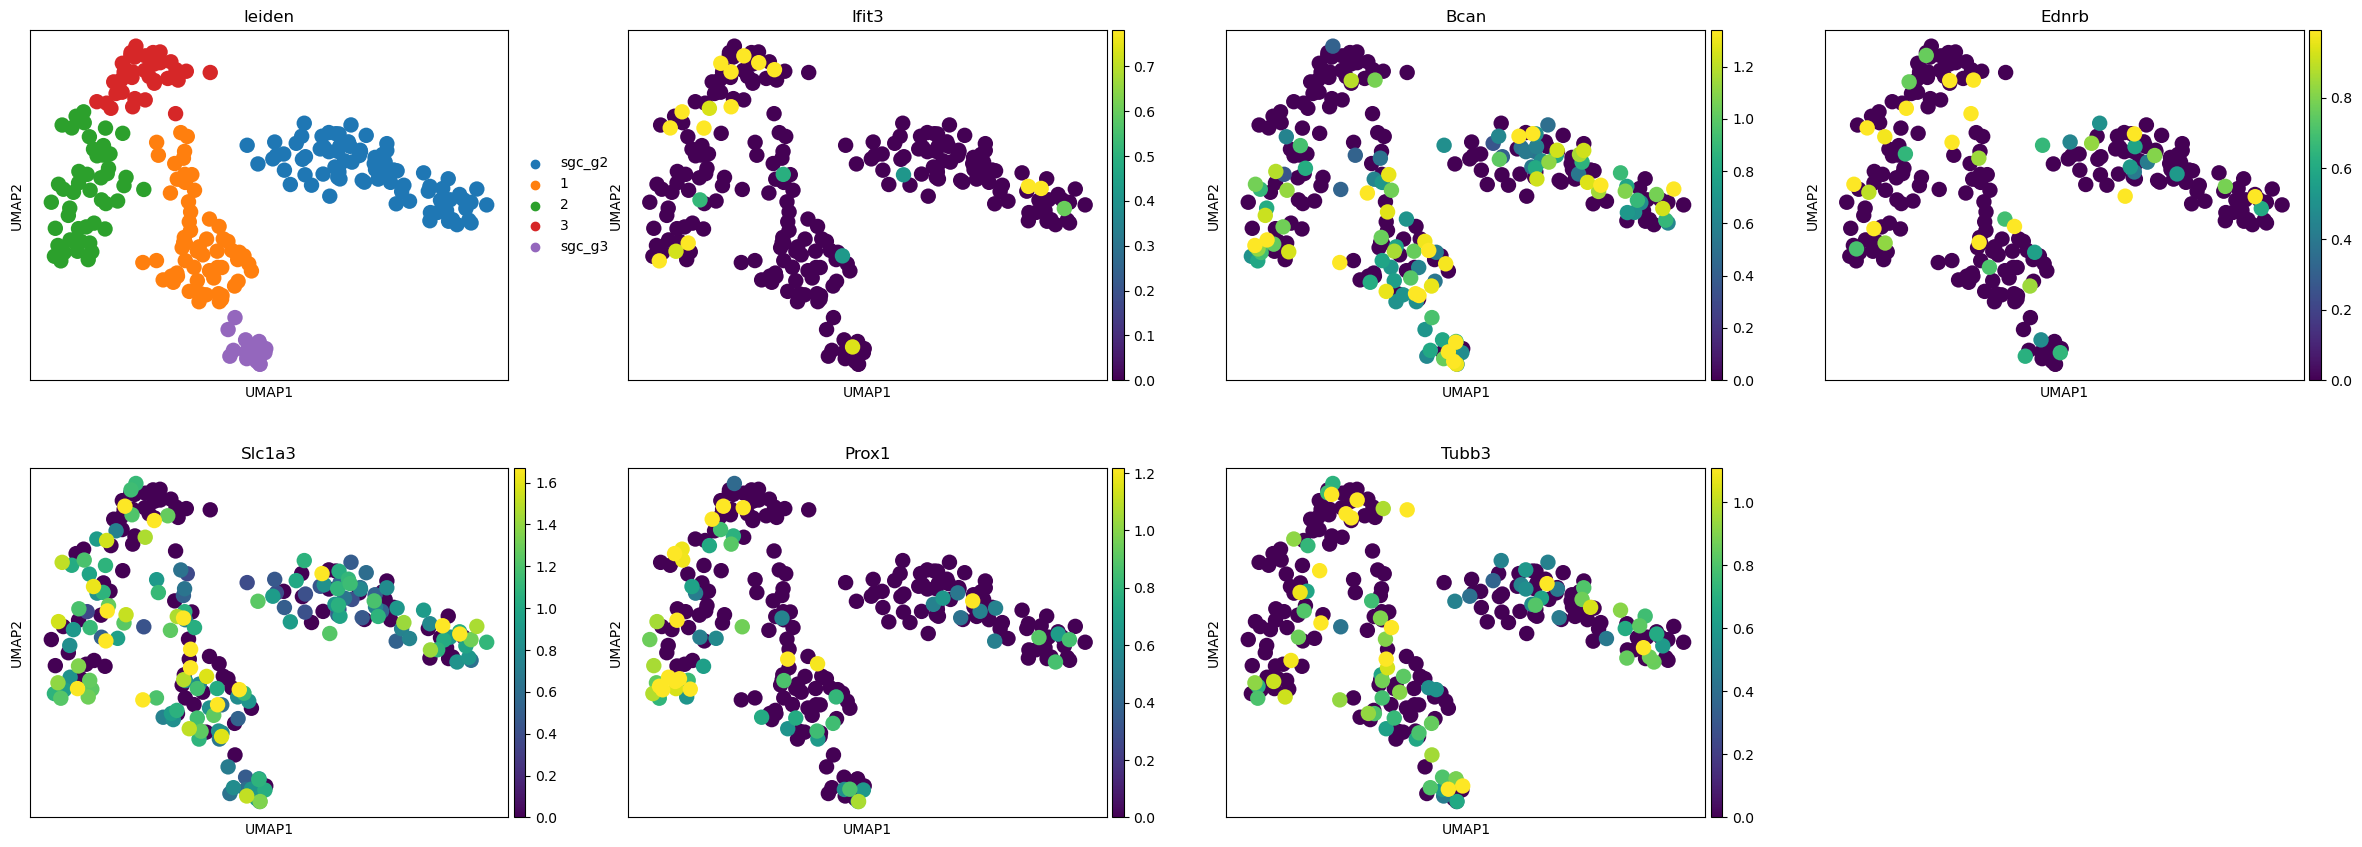

In [94]:
sc.pl.umap(Satelite_glial_cells, color=['leiden','Ifit3','Bcan','Ednrb','Slc1a3','Prox1','Tubb3'],layer='log1p',vmax='p95')

In [50]:
sc.pp.highly_variable_genes(Satelite_glial_cells, n_top_genes=500)
sc.pp.pca(Satelite_glial_cells)
sc.pp.neighbors(Satelite_glial_cells,n_neighbors=10, use_rep='X_pca')
sc.tl.leiden(Satelite_glial_cells,resolution=0.5)

[Executed on 2023-10-25 11:54:43.659339]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


### cluster 3 seems to be containmation because it has every cell type from the list

In [25]:
sc.get.rank_genes_groups_df(Satelite_glial_cells, group='3',log2fc_min=0.25)

[Executed on 2023-10-25 14:34:09.502997]


names    scores  logfoldchanges         pvals  pvals_adj
0      Elavl4  6.252983        4.477316  4.026872e-10   0.000001
1        Nefh  6.131364        5.127268  8.712857e-10   0.000002
2        Dlg2  5.979989        1.974913  2.231531e-09   0.000005
3       Gria3  5.787211        3.001336  7.156466e-09   0.000013
4       Mdga1  5.607371        3.549754  2.054225e-08   0.000030
...       ...       ...             ...           ...        ...
9276   Zc3h7a -4.288980        5.990697  1.794961e-05   0.004919
9277   Zfp148 -4.420948        2.207252  9.826886e-06   0.003333
9278  Ankrd17 -4.454587        5.412031  8.405485e-06   0.002928
9279     Nebl -4.884132        3.273272  1.038856e-06   0.000603
9280    Rsrc1 -4.938472        3.820834  7.873715e-07   0.000485

[9281 rows x 5 columns]

[Executed on 2023-10-25 14:33:25.379149]


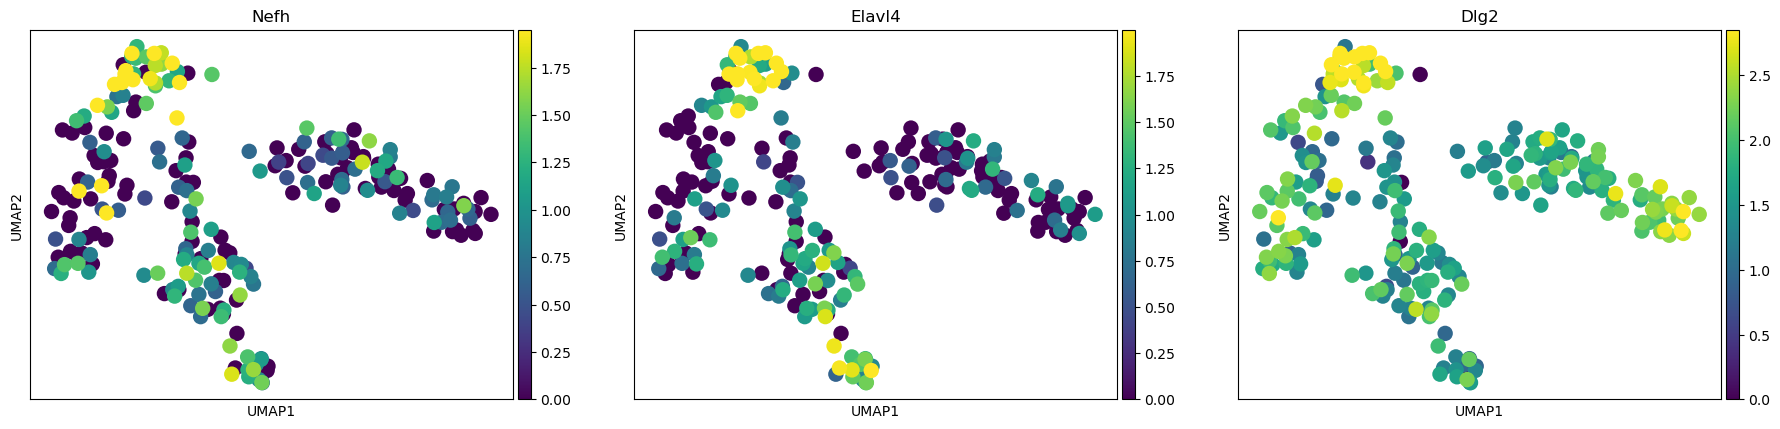

In [24]:
sc.pl.umap(Satelite_glial_cells,color=['Nefh','Elavl4','Dlg2'],layer='log1p',vmax='p95')

## cluster 2

[Executed on 2023-10-25 14:51:17.370609]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


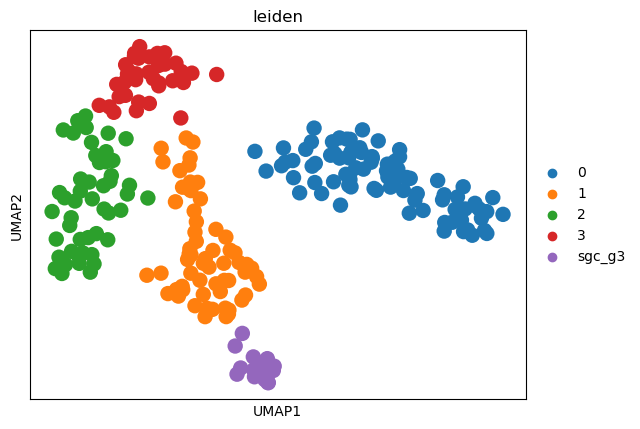

In [52]:
sc.pl.umap(Satelite_glial_cells,color='leiden')

In [28]:
a=sc.get.rank_genes_groups_df(Satelite_glial_cells, group='2',log2fc_min=0.25)
a.head(10)

[Executed on 2023-10-25 14:35:49.866368]


names    scores  logfoldchanges         pvals  pvals_adj
0        Trf  6.435654        1.993210  1.229425e-10   0.000004
1   Tmem178b  6.260188        1.646187  3.845138e-10   0.000006
2      Prr5l  5.779070        1.528725  7.511449e-09   0.000077
3  Mir219a-2  5.743977        1.537977  9.247828e-09   0.000077
4       Rtn4  5.619452        2.235142  1.915634e-08   0.000127
5      Enpp2  5.313801        1.383384  1.073616e-07   0.000592
6      Gnao1  5.286633        1.880675  1.245886e-07   0.000592
7        Mag  5.241351        1.359614  1.594053e-07   0.000633
8    Dscaml1  5.217578        2.109667  1.812779e-07   0.000633
9       St18  5.208522        2.411478  1.903512e-07   0.000633

In [108]:
known_cluster.obs['cell_type'].value_counts()

[Executed on 2023-10-25 16:09:07.758889]


cell_type
Fibrocyte                310
Schwann_cells            306
Osteocytes               289
Satellite_glial_cells    244
Oligo                    124
Basal                    124
chondrocyte               89
Osteoblasts               72
Type_1C_neuron            56
Type_1A_neuron            54
endothelial               39
immune                    21
Type_1B_neuron            19
Pericytes                 17
Type_2_neuron              8
Name: count, dtype: int64

[Executed on 2023-10-25 16:50:05.106329]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


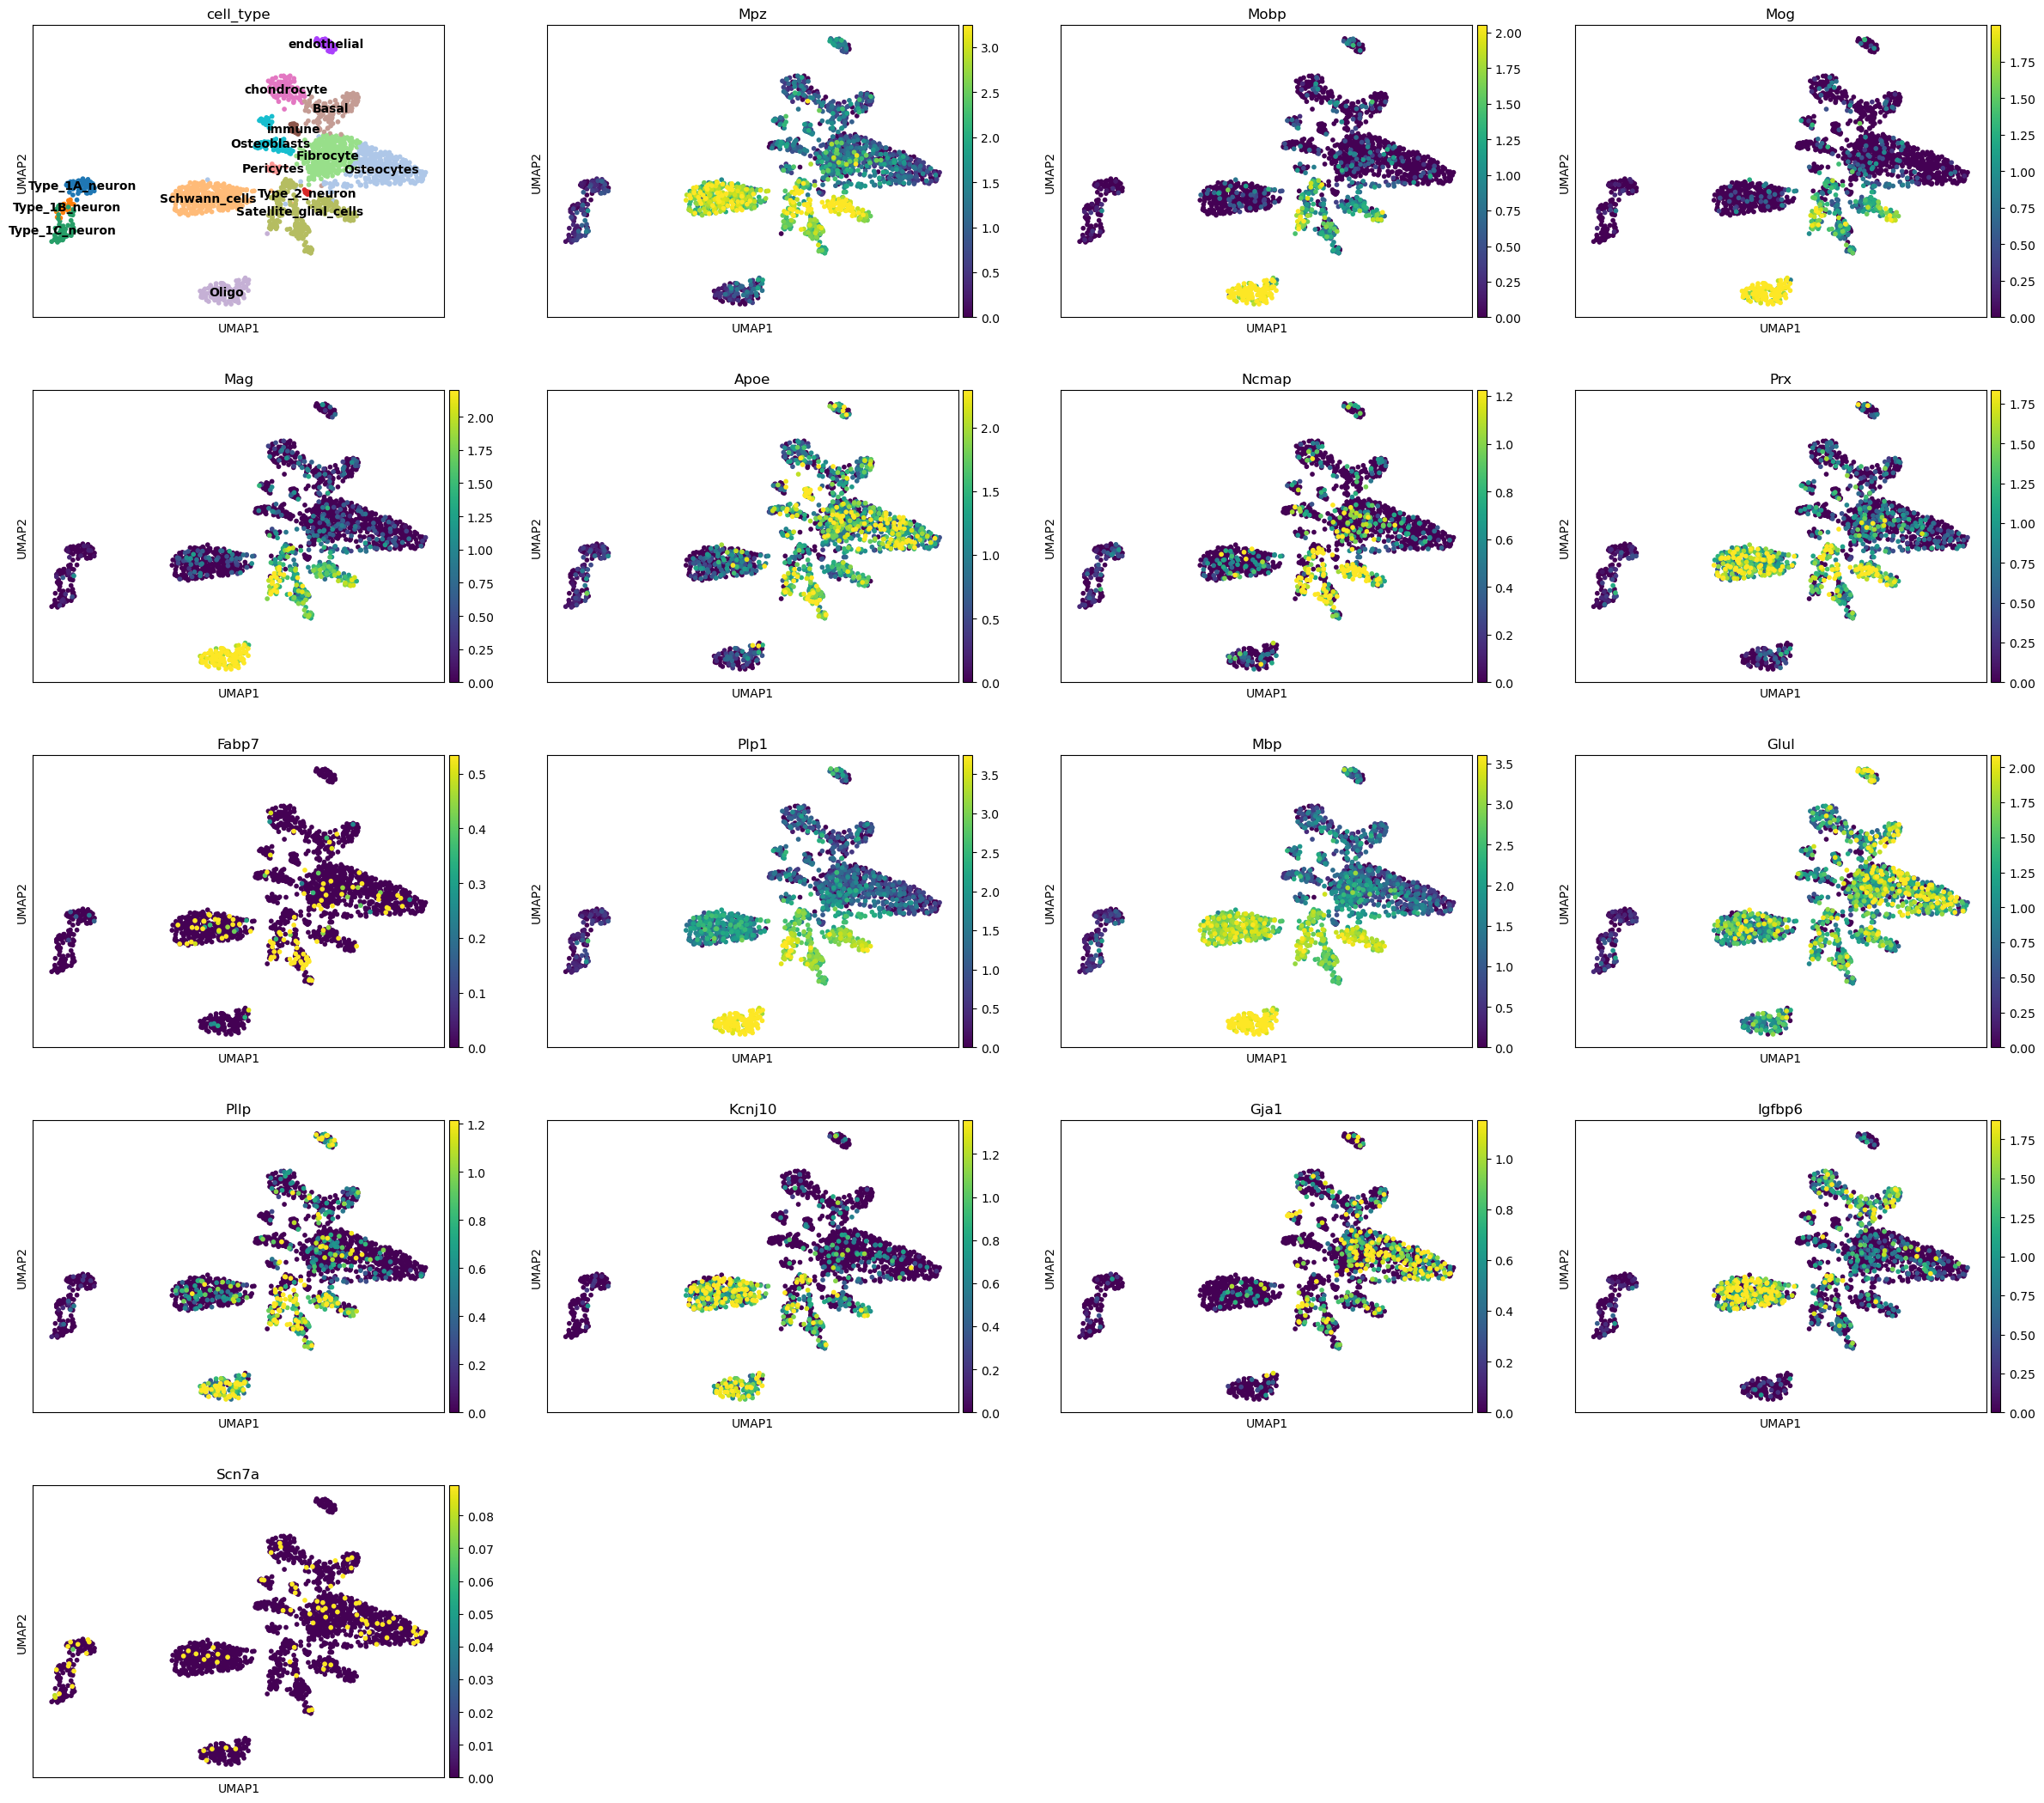

In [119]:
sc.pl.umap(known_cluster,color=['cell_type','Mpz','Mobp','Mog','Mag','Apoe','Ncmap','Prx','Fabp7','Plp1','Mbp','Glul','Pllp','Kcnj10','Gja1','Igfbp6','Scn7a'],layer='log1p',vmax='p95',legend_loc='on data')

[Executed on 2023-10-25 16:51:46.667291]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


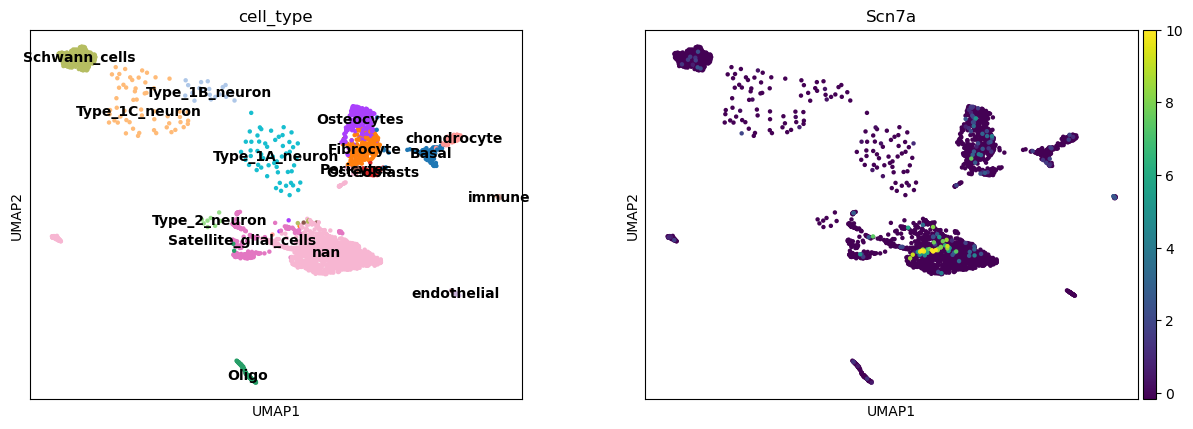

In [121]:
sc.pl.umap(adata,color=['cell_type','Scn7a'],legend_loc='on data')

[Executed on 2023-10-25 15:56:15.042325]


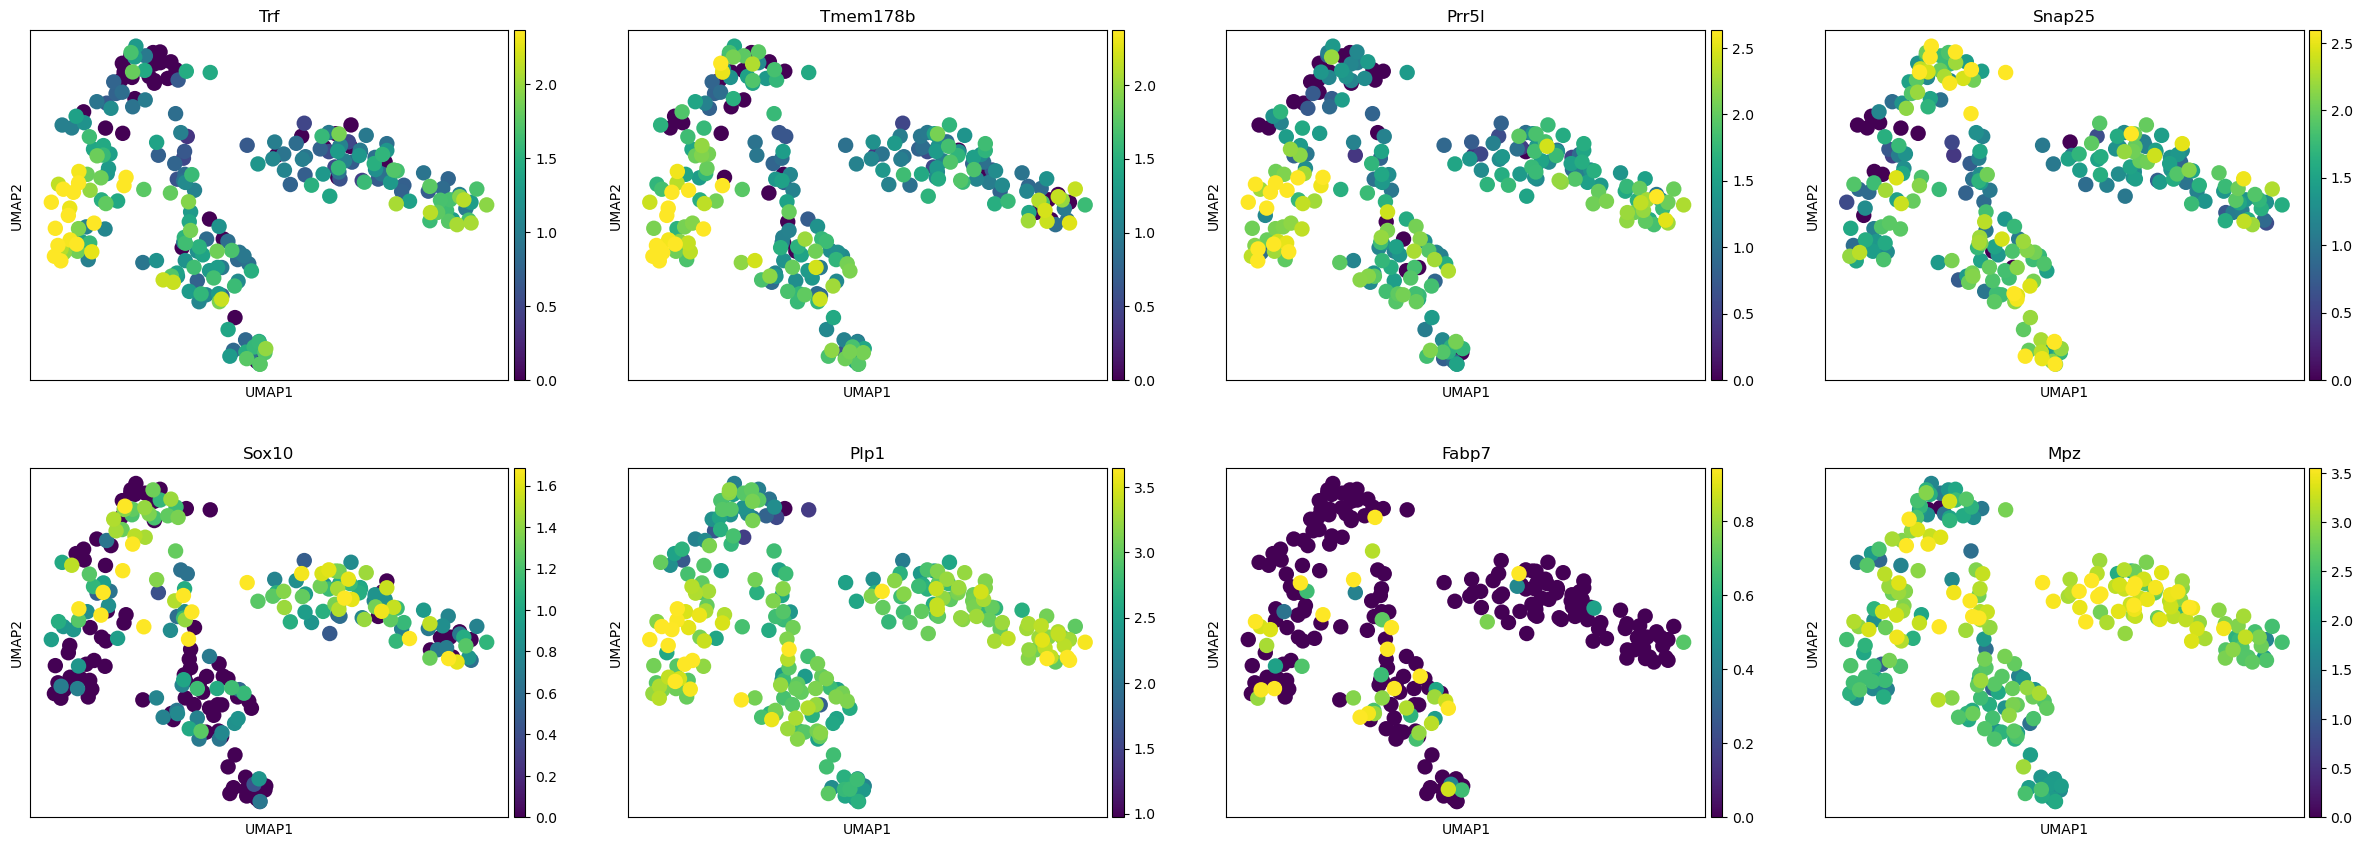

In [98]:
sc.pl.umap(Satelite_glial_cells,color=['Trf','Tmem178b','Prr5l','Snap25','Sox10','Plp1','Fabp7','Mpz'],layer='log1p',vmax='p95')

In [48]:
gene_list_group3 = [
    "Agtpbp1", "Arfgef3", "Larp1", "Dync1h1", "Tbc1d9", "Ube2o",
    "Arfgef2", "Dmxl2", "Ap3b2", "Dubr", "Ubash3b", "Cacnb4",
    "Tcaf1", "Onecut2", "Synrg", "Entpd3", "Hmbox1", "4930568A12Rik"
]


[Executed on 2023-10-25 14:48:07.999751]


In [35]:
Satelite_glial_cells

[Executed on 2023-10-25 14:39:52.858292]


AnnData object with n_obs × n_vars = 244 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'sub2_score', 'sub3_score'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_2nd', 'X_umap', 'X_umapOriginal', 'X_umap_2nd', 'X_umap_before'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-25 14:48:02.018498]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


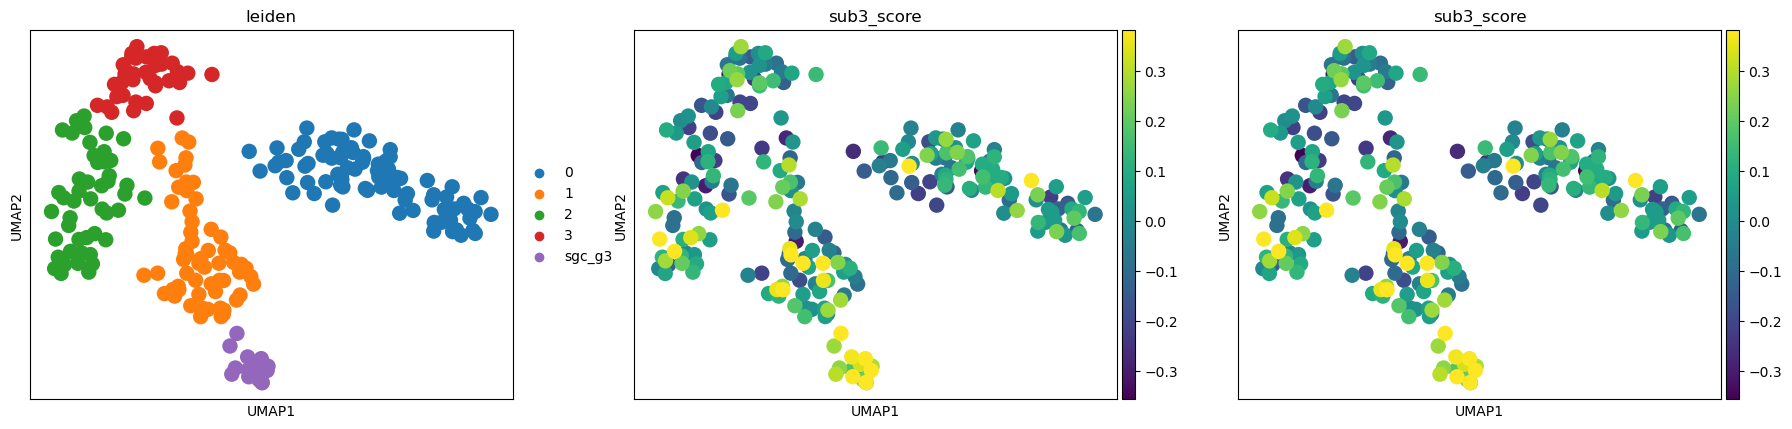

In [47]:
sc.pl.umap(Satelite_glial_cells, color=['leiden','sub3_score','sub3_score'],vmax='p95')

# cluster 0

In [66]:
a=sc.get.rank_genes_groups_df(Satelite_glial_cells, group='1',log2fc_min=0.25,pval_cutoff=0.05)
a.head(10)

[Executed on 2023-10-25 14:58:09.957338]


names    scores  logfoldchanges         pvals     pvals_adj
0  Ranbp3l  8.973598        4.860527  2.869848e-19  9.539662e-15
1    Fgf12  8.541046        3.861564  1.330116e-17  1.473813e-13
2  Gm27000  8.257217        4.379433  1.491072e-16  1.239118e-12
3     Meg3  7.726217        2.027542  1.107896e-14  6.343130e-11
4     Etl4  7.722028        4.459851  1.144935e-14  6.343130e-11
5    Kcnq4  7.684323        4.544176  1.538075e-14  7.303880e-11
6    Trpm3  7.459146        3.586568  8.708525e-14  3.618501e-10
7  Zfp804a  7.158559        3.130794  8.152918e-13  3.011235e-09
8    Kcnc2  6.933382        3.329542  4.108974e-12  1.365864e-08
9   Rbfox1  6.753240        3.901421  1.445800e-11  4.369076e-08

In [71]:
gene_list_gp1=[ "Iah1", "Ptma", "Hmgb1", "Hnrnpc", "Trmt112", "Ube2i", 
    "Sf3b2", "Polr2e", "Arpc5", "Cdk2ap1", "Arpc1a", "Fam192a"]

gene_list_gp2 = [
    "Fam126a", "Gramd1b", "Lamc1", "Ctnnd1", "Spink5", "Adgra3", 
    "Dennd2a", "Abca1", "Yap1", "Rasa3", "Slc43a2", "Sort1", "Tmc7", 

]

gene_list_gp0= [
    "Aldoc", "Pon2", "Fbln5", "Ctsk", "Cat", "Npc2", "Bsg", "Cib1", 
    "S100a1", "Pmvk", "Mmd2", "Pebp1", "Wfdc1", "Rsph9", "Apoe", 

]

gene_list_gp6= [
    "Ywhag", "Ywhab", "Dctn1", "Prkar1b", "Rtn3", "Klc1", "Nefh", 
    "Kif5a", "Snap25", "Gabarapl1", "Eif5a2", "Tspyl4", "Bnip3", 
]


gene_list_gp3=["Agtpbp1", "Arfgef3", "Larp1", "Dync1h1", "Tbc1d9", "Ube2o", 
    "Arfgef2", "Dmxl2", "Ap3b2", "Dubr", "Ubash3b", "Cacnb4"]

gene_list_gp4=[ "Ring1", "Anapc5", "Ncaph2", "Zfp358", "Agpat2", "Tmbim1", 
    "Impdh2", "Nab2", "Cyth2", "Sat1", "Gps2", "BC004004"]

gene_list_gp5=[ "Ube2v2", "Sdcbp", "Atp1b1", "Pafah1b2", "Rtn3", "Trappc2",
    "Nptn", "Vps35", "Ghitm", "Ywhag", "Ncdn", "Tmem30a"]


gene_list={
    'gp0':gene_list_gp0,
    'gp1':gene_list_gp1,
    'gp2':gene_list_gp2,
    'gp3':gene_list_gp3,
    'gp4':gene_list_gp4,
    'gp5':gene_list_gp5,
    'gp6':gene_list_gp6,
}

[Executed on 2023-10-25 15:06:14.138961]


In [73]:
for key in gene_list.keys():
    sc.tl.score_genes(Satelite_glial_cells, gene_list[key], score_name=key)

[Executed on 2023-10-25 15:06:59.291403]


In [74]:
Satelite_glial_cells

[Executed on 2023-10-25 15:07:05.926211]


AnnData object with n_obs × n_vars = 244 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'sub2_score', 'sub3_score', 'gp2_score', 'gp0_score', 'gp6_score', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_2nd', 'X_umap', 'X_umapOriginal', 'X_umap_2nd', 'X_umap_before'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-10-25 15:07:30.656678]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


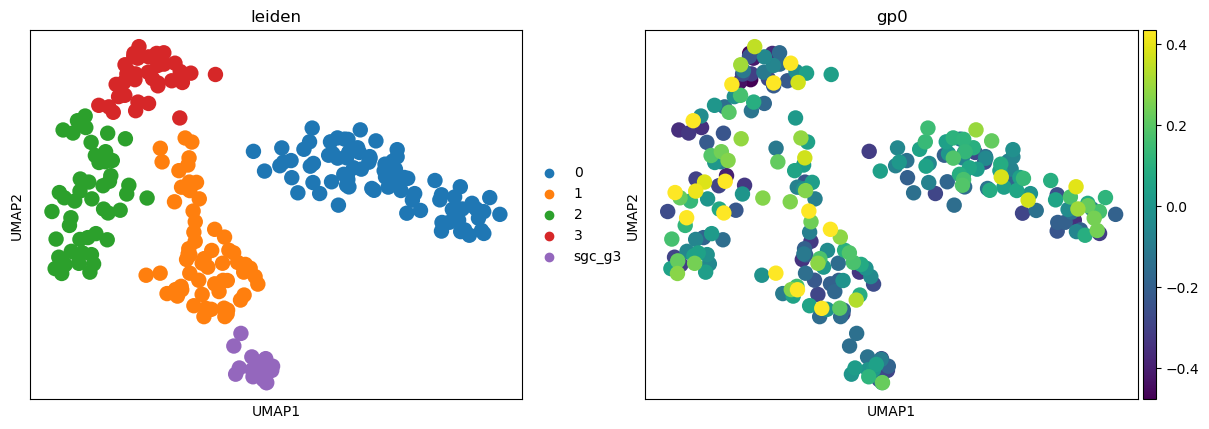

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


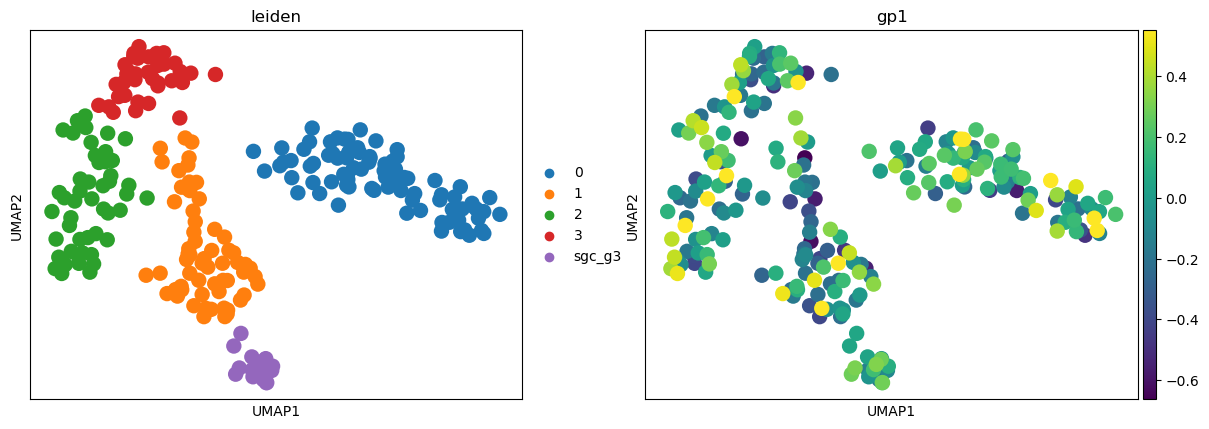

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


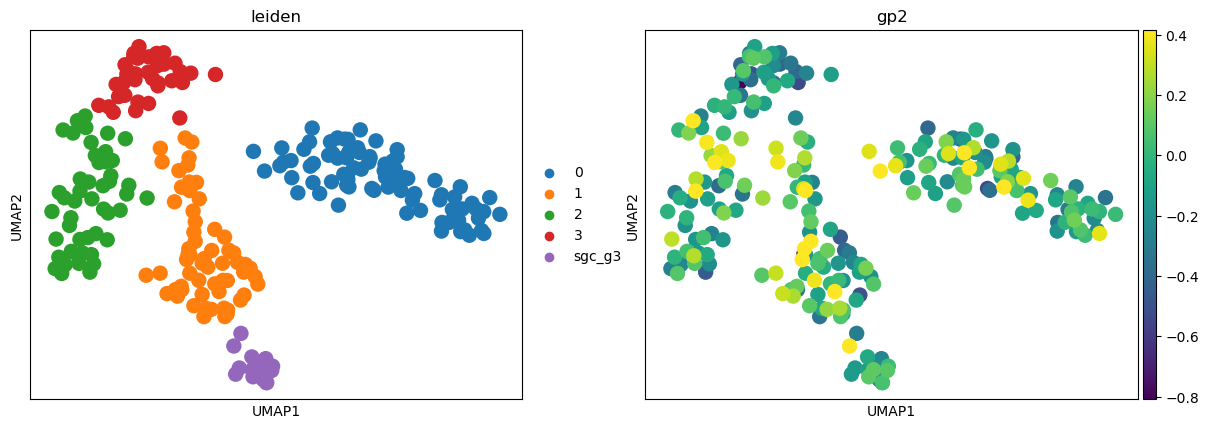

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


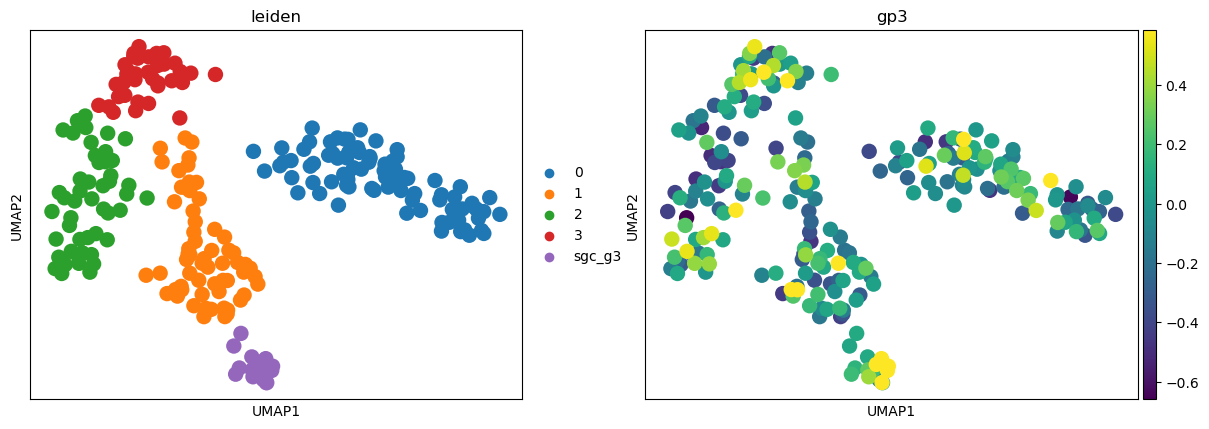

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


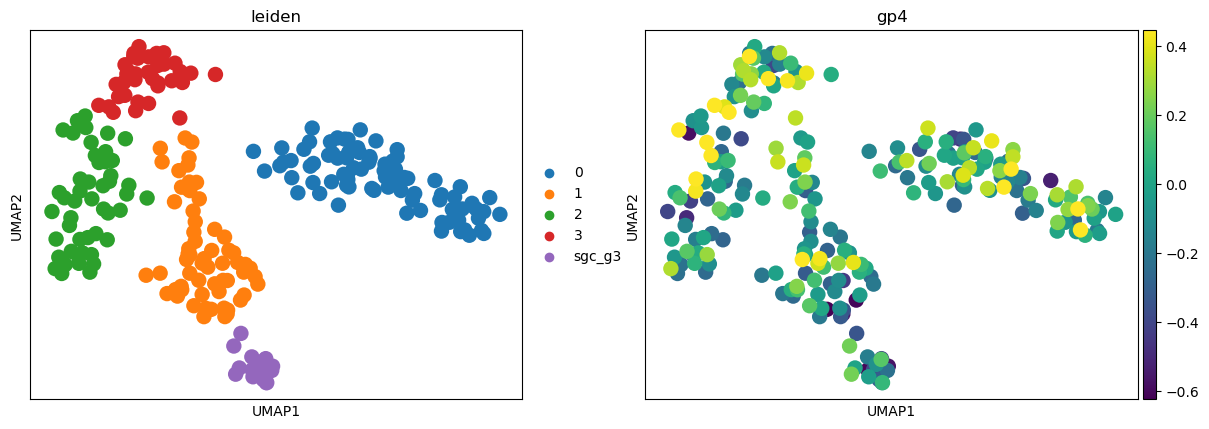

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


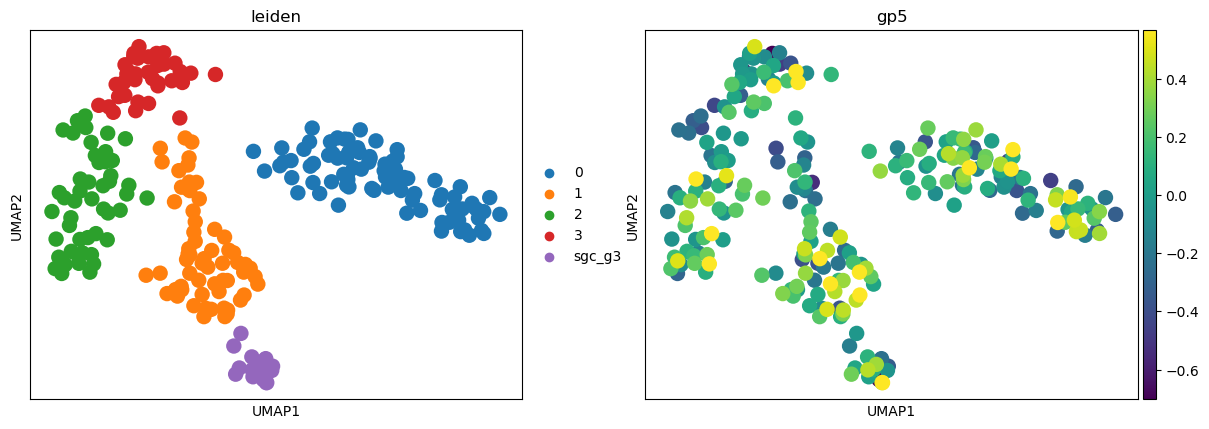

/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


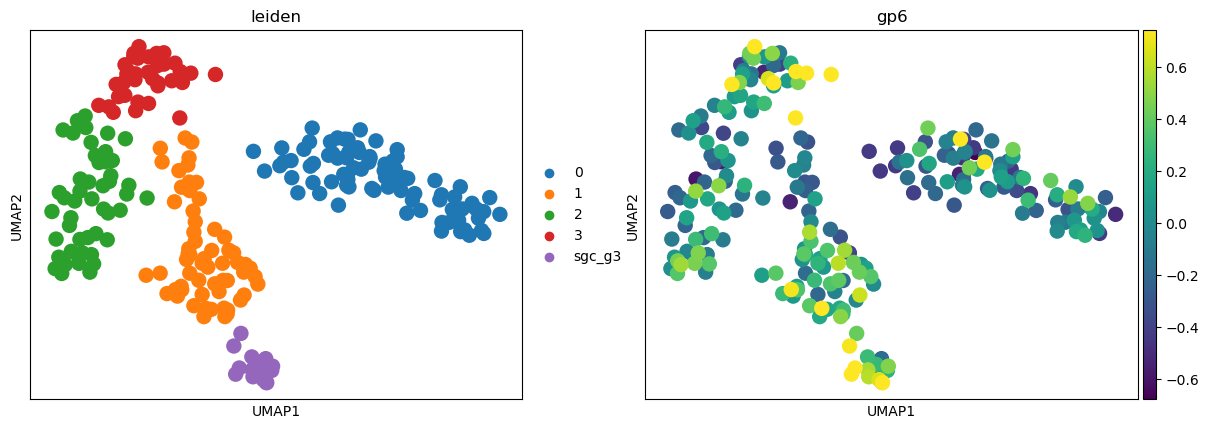

In [75]:
for i in gene_list.keys():
    sc.pl.umap(Satelite_glial_cells, color=['leiden',i],vmax='p95')

In [86]:
sc.get.rank_genes_groups_df(Satelite_glial_cells, group='1',log2fc_min=0.25).head(10)

[Executed on 2023-10-25 15:17:05.816088]


names    scores  logfoldchanges         pvals     pvals_adj
0  Ranbp3l  8.973598        4.860527  2.869848e-19  9.539662e-15
1    Fgf12  8.541046        3.861564  1.330116e-17  1.473813e-13
2  Gm27000  8.257217        4.379433  1.491072e-16  1.239118e-12
3     Meg3  7.726217        2.027542  1.107896e-14  6.343130e-11
4     Etl4  7.722028        4.459851  1.144935e-14  6.343130e-11
5    Kcnq4  7.684323        4.544176  1.538075e-14  7.303880e-11
6    Trpm3  7.459146        3.586568  8.708525e-14  3.618501e-10
7  Zfp804a  7.158559        3.130794  8.152918e-13  3.011235e-09
8    Kcnc2  6.933382        3.329542  4.108974e-12  1.365864e-08
9   Rbfox1  6.753240        3.901421  1.445800e-11  4.369076e-08

[Executed on 2023-10-25 15:16:46.404806]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


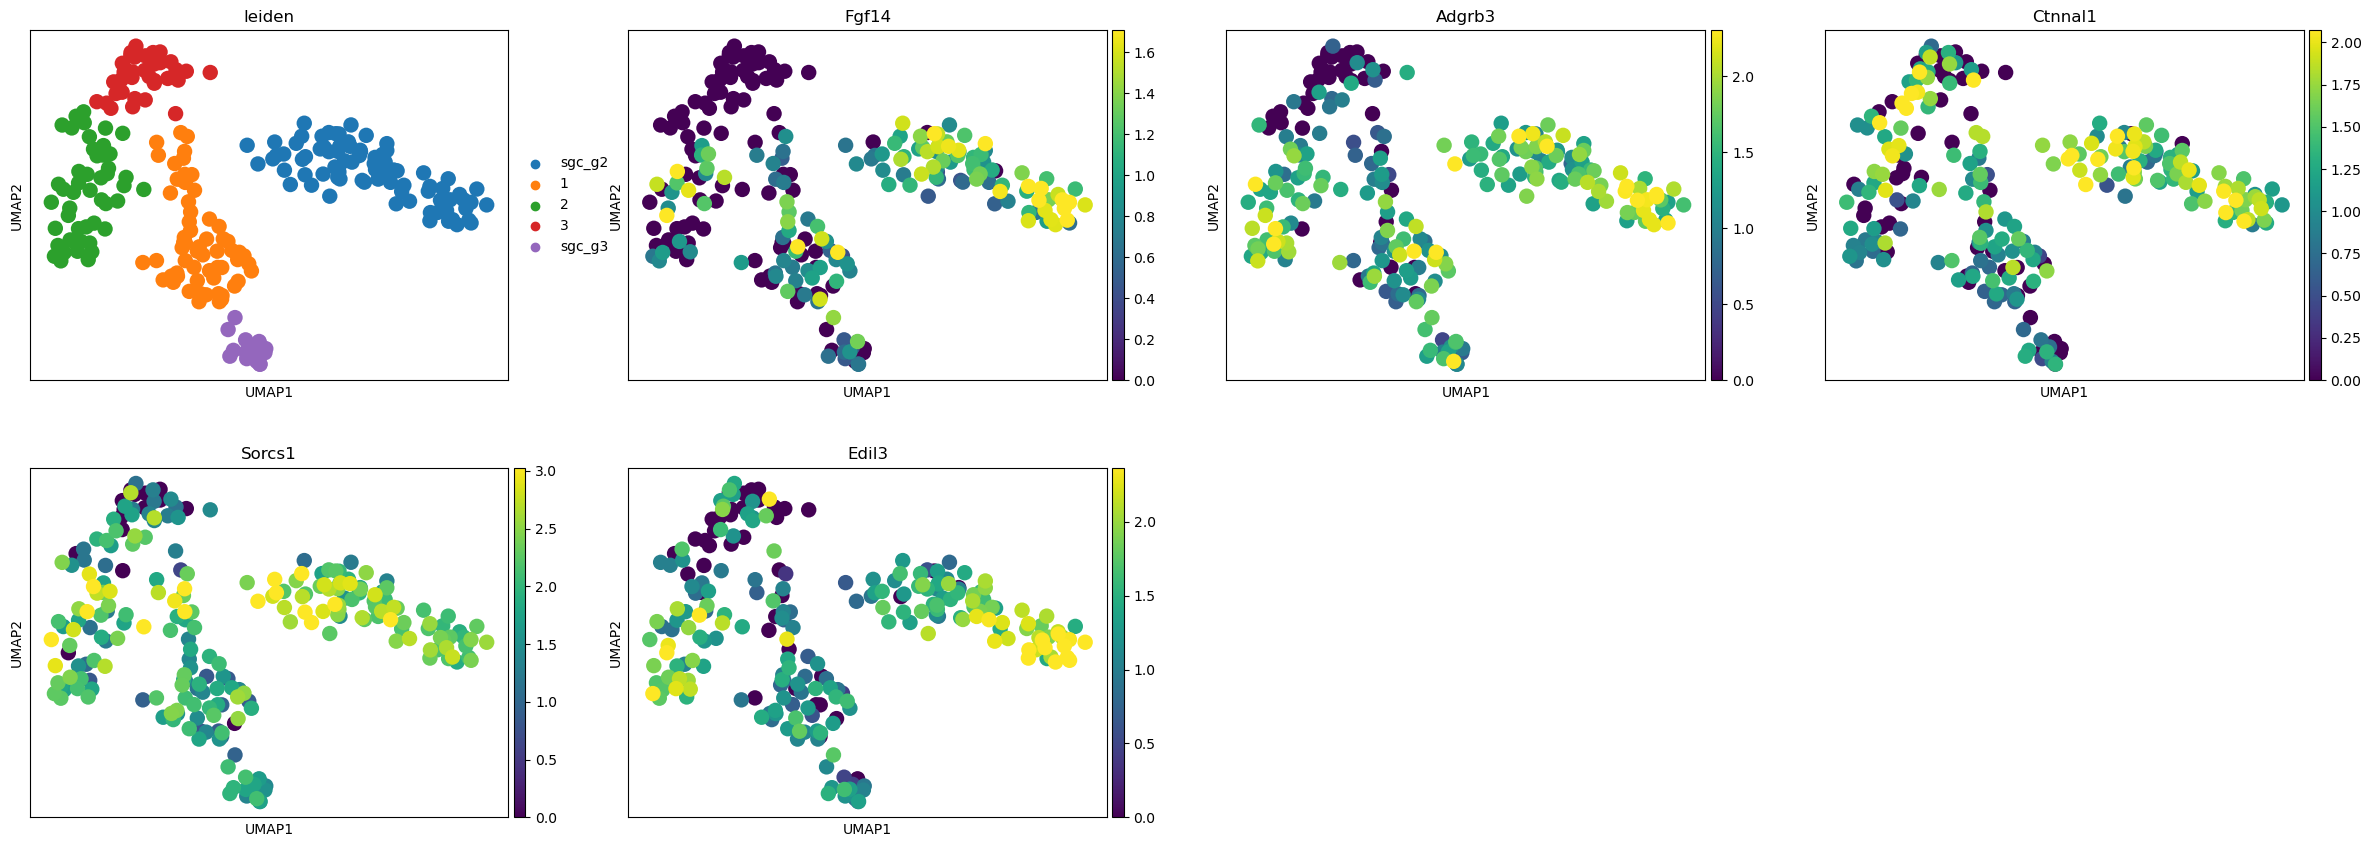

In [85]:
sc.pl.umap(Satelite_glial_cells,color=['leiden','Fgf14','Adgrb3','Ctnnal1','Sorcs1','Edil3'],layer='log1p',vmax='p95')

In [84]:
Satelite_glial_cells.obs['leiden']=Satelite_glial_cells.obs['leiden'].replace({'0':'sgc_g2'})

[Executed on 2023-10-25 15:16:40.649731]


[Executed on 2023-10-25 15:21:42.304079]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


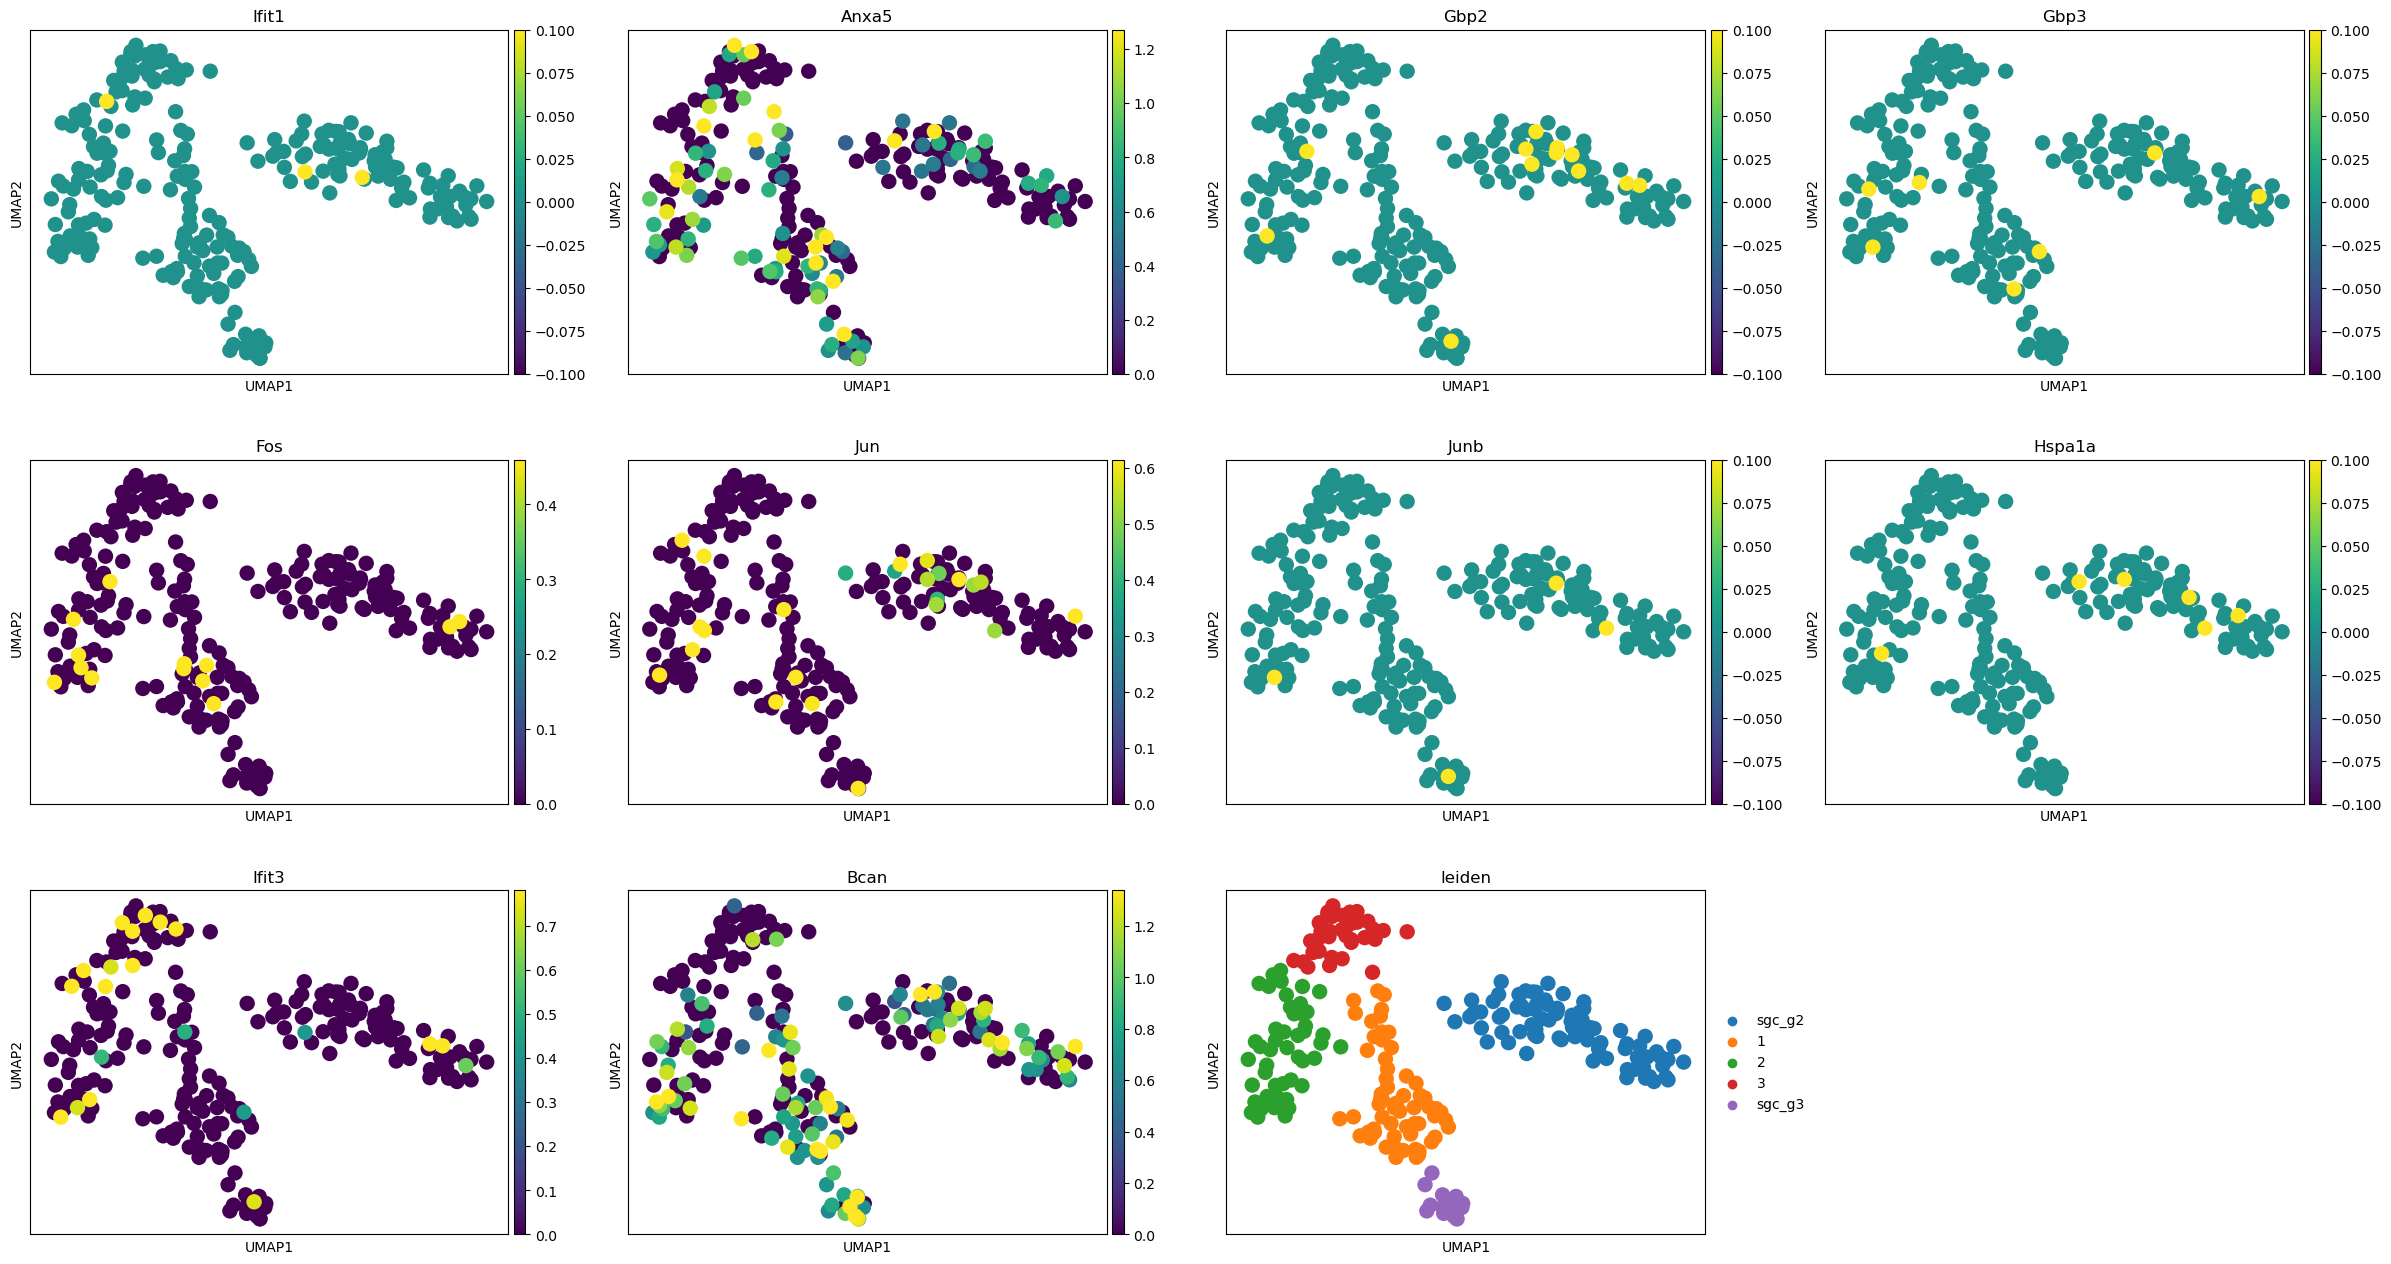

In [91]:
sc.pl.umap(Satelite_glial_cells,color=['Ifit1','Anxa5','Gbp2','Gbp3','Fos','Jun','Junb','Hspa1a','Ifit3','Bcan','leiden'],layer='log1p',vmax='p95')

[Executed on 2023-10-25 15:22:10.827922]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


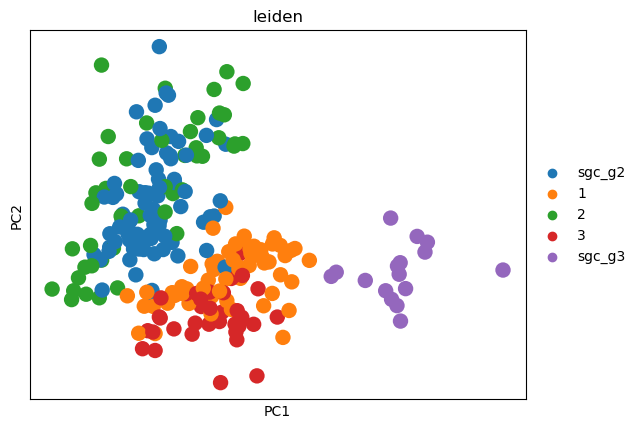

In [92]:
sc.pl.pca(Satelite_glial_cells,color='leiden')

[Executed on 2023-10-25 16:04:17.560676]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


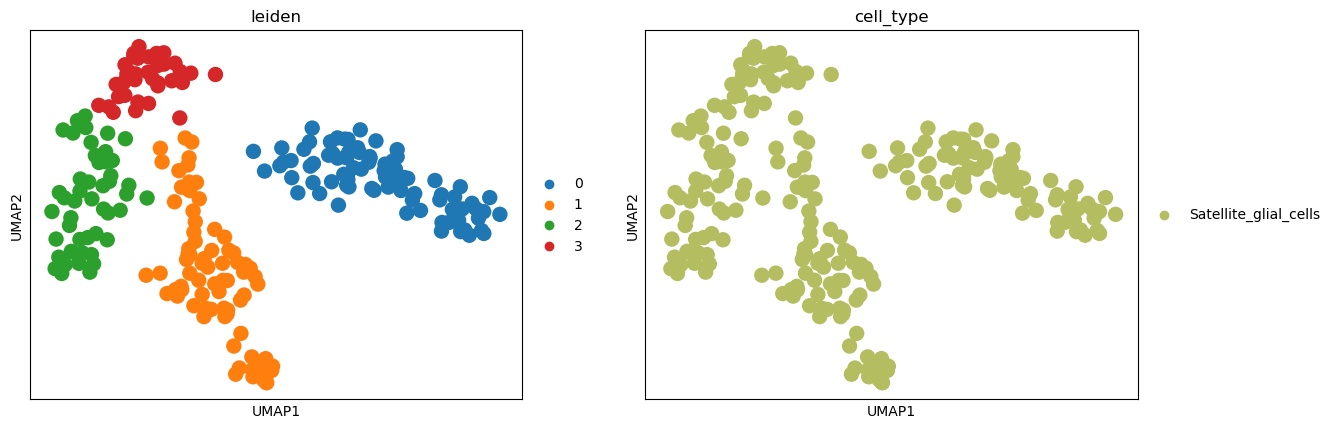

In [104]:
sc.tl.leiden(Satelite_glial_cells,resolution=0.1)
sc.pl.umap(Satelite_glial_cells,color=['leiden','cell_type'])

[Executed on 2023-10-25 16:04:27.367928]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


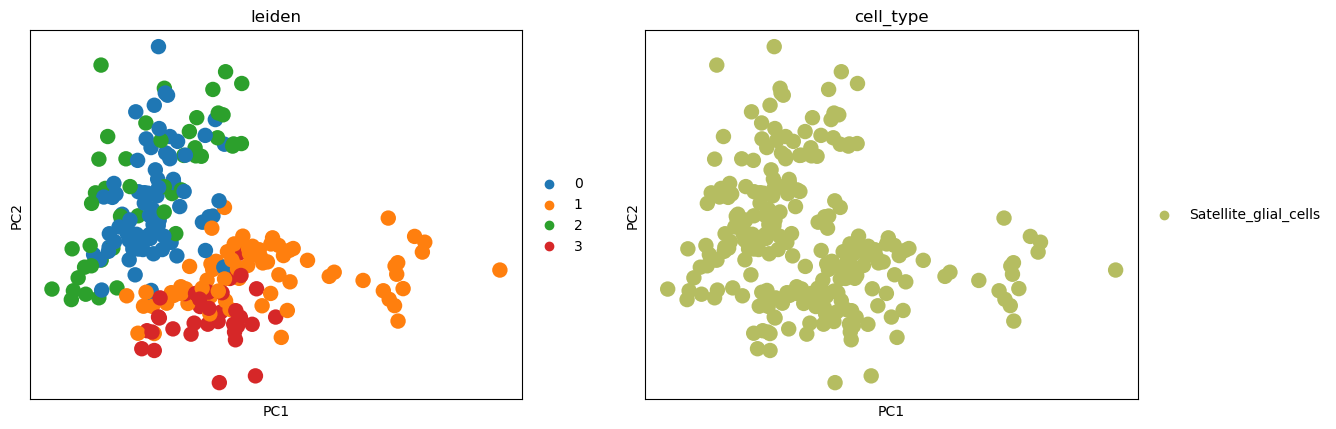

In [105]:
sc.pl.pca(Satelite_glial_cells,color=['leiden','cell_type'])

In [107]:
#sc.tl.rank_genes_groups(Satelite_glial_cells, 'leiden', method='wilcoxon')
sc.get.rank_genes_groups_df(Satelite_glial_cells, group='0',log2fc_min=0.25,pval_cutoff=0.05).head(10)

[Executed on 2023-10-25 16:05:59.690958]


names    scores  logfoldchanges         pvals     pvals_adj
0     Aatk  8.694706        4.350929  3.477281e-18  1.651262e-14
1    Fgf14  8.535803        7.382475  1.391857e-17  4.626672e-14
2   Sh3tc2  7.496229        7.456287  6.568018e-14  8.397211e-11
3    Limk2  7.180336        5.743373  6.954031e-13  5.778974e-10
4   Adgrb3  7.061637        2.442261  1.645525e-12  1.272067e-09
5      Mpz  6.956339        1.576645  3.492280e-12  2.418477e-09
6  Slc12a2  6.931451        4.740410  4.165462e-12  2.825798e-09
7  Ctnnal1  6.925707        5.345531  4.338024e-12  2.827456e-09
8   Sorcs1  6.872101        2.989445  6.326299e-12  3.894306e-09
9    Edil3  6.705540        1.802019  2.006633e-11  1.093483e-08

In [122]:
adata

[Executed on 2023-10-25 16:53:46.886257]


AnnData object with n_obs × n_vars = 2954 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [124]:
non_myelin_known_cluster=adata[adata.obs['cell_type']=='nan',:]


[Executed on 2023-10-25 16:53:58.407478]


[Executed on 2023-10-25 16:54:30.515725]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


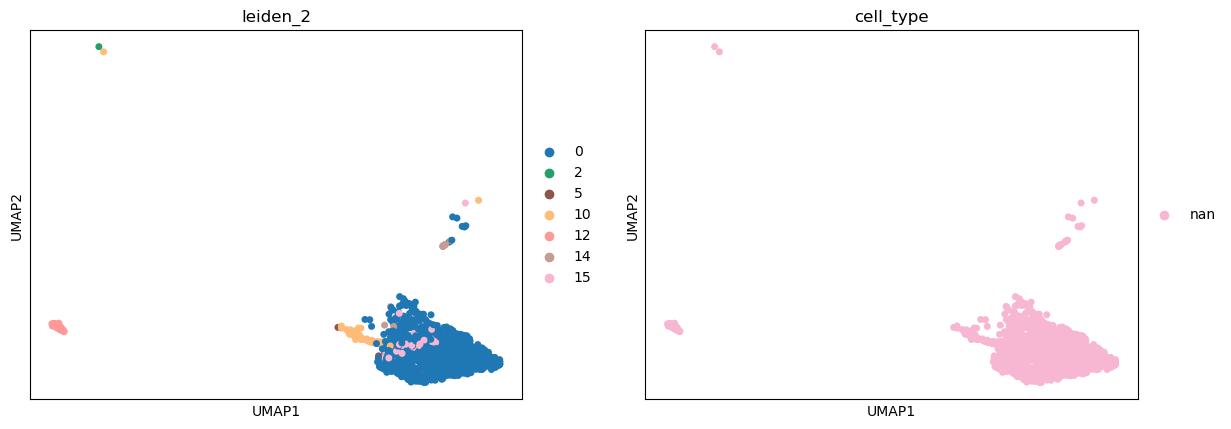

In [126]:
sc.pl.umap(non_myelin_known_cluster,color=['leiden_2','cell_type'])

In [ ]:
non_myelin_known_cluster

[Executed on 2023-10-25 17:21:34.030517]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


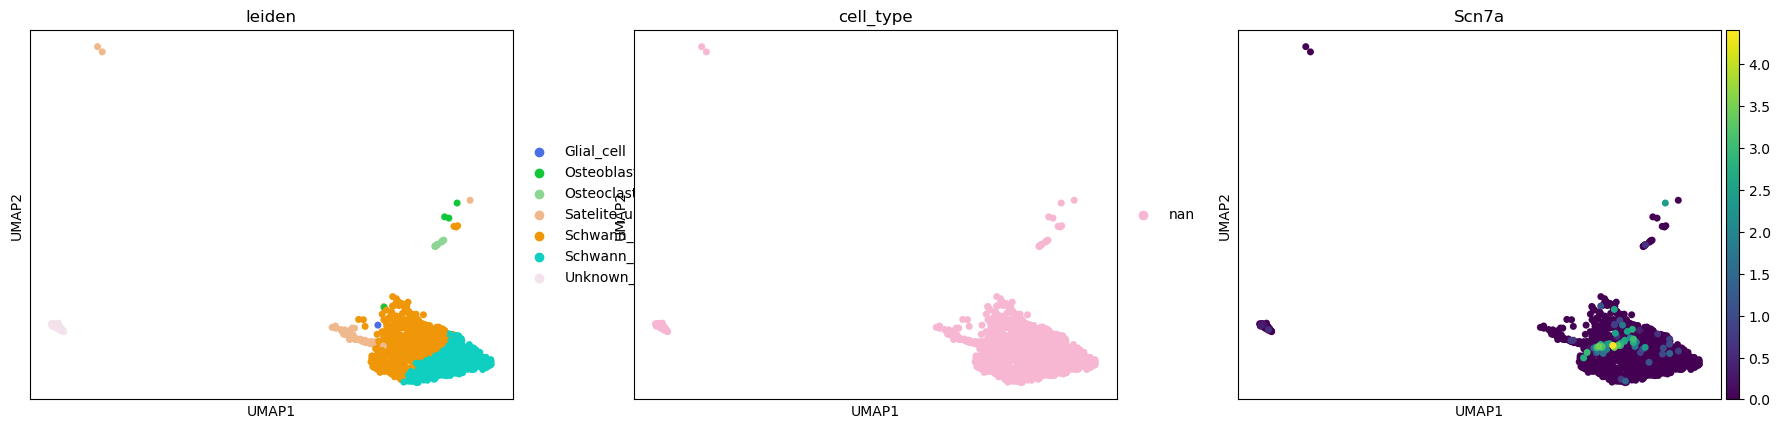

In [144]:
sc.pl.umap(non_myelin_known_cluster,color=['leiden','cell_type','Scn7a'],layer='log1p')

In [133]:
gene_index = adata.var_names.tolist().index('Scn7a')
cells_with_high_expression = adata.obs_names[adata.layers['log1p'][:, gene_index] > 0.2]


[Executed on 2023-10-25 16:59:40.118652]


[Executed on 2023-10-25 17:01:11.412801]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


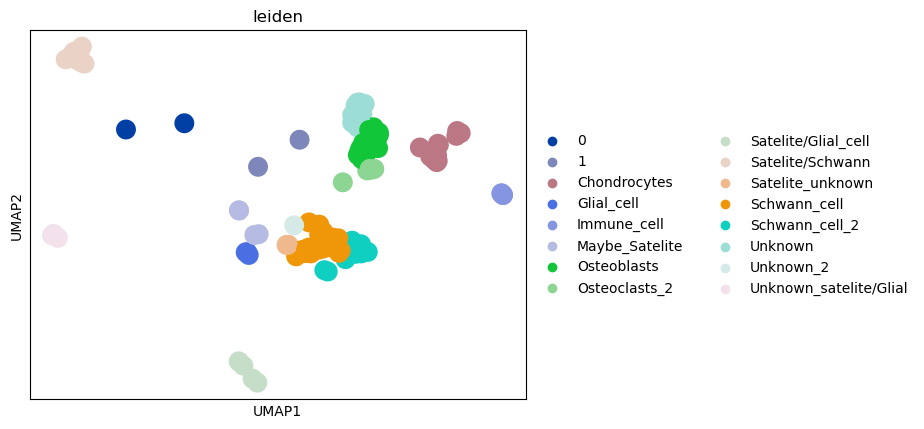

In [136]:
high_expression = adata[cells_with_high_expression, :]

sc.pl.umap(high_expression,color='leiden')


In [138]:
known_cluster.obs['cell_type'].value_counts()

[Executed on 2023-10-25 17:19:21.483150]


cell_type
Fibrocyte                310
Schwann_cells            306
Osteocytes               289
Satellite_glial_cells    244
Oligo                    124
Basal                    124
chondrocyte               89
Osteoblasts               72
Type_1C_neuron            56
Type_1A_neuron            54
endothelial               39
immune                    21
Type_1B_neuron            19
Pericytes                 17
Type_2_neuron              8
Name: count, dtype: int64

In [139]:
# Swap glial and schwann

known_cluster.obs['cell_type']=known_cluster.obs['cell_type'].replace({'Schwann_cells':'Schwann_cells_2'})
known_cluster.obs['cell_type']=known_cluster.obs['cell_type'].replace({'Satellite_glial_cells':'Schwann_cells'})
known_cluster.obs['cell_type']=known_cluster.obs['cell_type'].replace({'Schwann_cells_2':'Satellite_glial_cells'})

[Executed on 2023-10-25 17:19:48.354903]


[Executed on 2023-10-25 17:20:10.168614]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


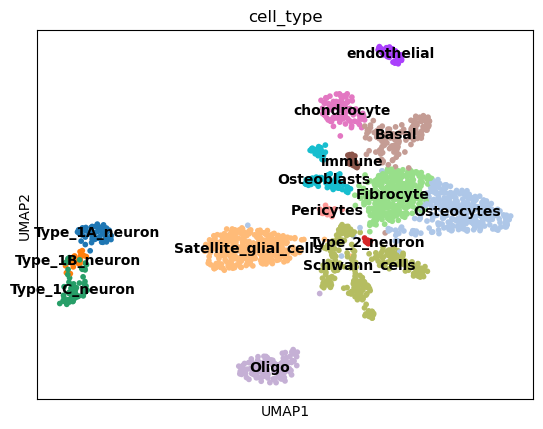

In [142]:
sc.pl.umap(known_cluster,color=['cell_type'],legend_loc='on data')

In [143]:
known_cluster.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIV_with_annotated_subset_without_unknown_repca.h5ad")

[Executed on 2023-10-25 17:20:35.587650]
